---
title: Logistic Regression Blog Post
author: Otis Milliken
date: '2024-04-02'
description: "Blog Post for CS0451"
format: html
---

# LINK TO LOGISTIC REGRESSION

https://github.com/Hokalaka2/Hokalaka2.github.io/blob/main/posts/logistic.py

In [196]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Abstract

My project explores the Logistic Regression model to classify points. It examines how momentum can improve a models performance. Lastly, I look into how too many features can hurt algorithms performance from over fitting.

## Overarching methods

There are a couple methods that I use throughtout. These include creating the data in the classification data method, plotting with plot_data method, and drawing the w lines with draw_line method. Most of these are taken from Prof. Phil's lectures. 

In [197]:
import torch

def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y


In [198]:
def plot_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

In [199]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

## Data

Here is what are data looks like from the start. As we can see, it is very clearly linearly seperable.

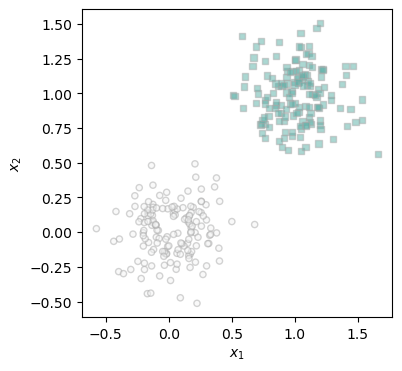

In [200]:
from matplotlib import pyplot as plt
X, y = classification_data(300, 0.2, p_dims = 2)
fig, ax = plt.subplots(1, 1, figsize= (4, 4))
plot_data(X, y, ax)

## Logistic Training Loop

Here we can see the logistic training loop for the data that we saw above. Basically at each step, we first take the loss, then make a step. If the loss is below our threshold of 0.001 then our loop ends. I add all the losses to a array so that I can plot them later on. In this example, we're not using momentum. That makes this loop a vanilla gradient descent algorithm. 

In [201]:
torch.manual_seed(123)

X, y = classification_data(300, 0.2, p_dims = 2)

LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss_vec = []
loss = 1.0
iter = 1
max_iter = 1000

while iter < max_iter and loss > 0.001:
    # add other stuff to e.g. keep track of the loss over time. 
    loss = LR.loss(X, y)
    loss_vec.append(loss)
    opt.step(X, y, alpha = 0.1, beta = 0)
    iter += 1

    

## Plotting Loss

Here we can see how the loss changes over time on a semilogx axis. We can see that it's a s curve looking graph which means that the change in loss is initial slow, speeds up, and then is slow again.

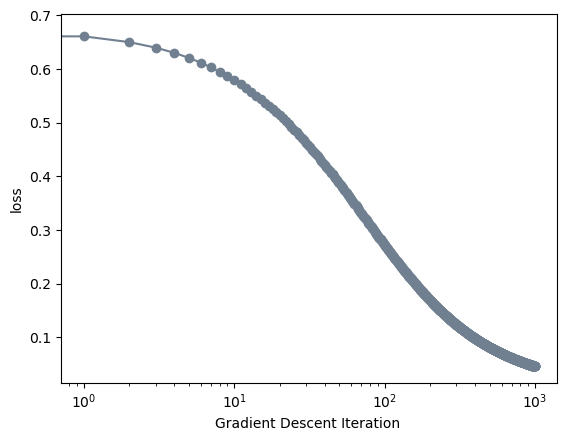

In [202]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
plt.semilogx()
labs = plt.gca().set(xlabel = "Gradient Descent Iteration ", ylabel = "loss")

Here we can see the line that the model created. As we can tell, it clearly seperates the data.

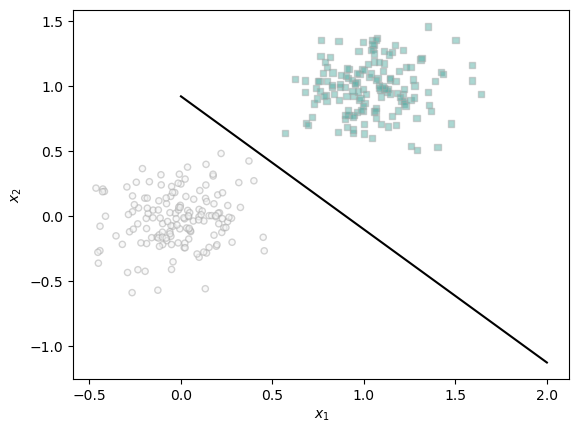

In [203]:
fig, ax = plt.subplots(1, 1)
plot_data(X, y, ax)

draw_line(LR.w, x_min = 0, x_max = 2, ax = ax, color = "black", linestyle = "solid")

## Training with momentum

This time around we are going to add a 0.9 beta which means that we're adding momentum. This will hopefully speed up the convergence of our model. 

In [204]:
torch.manual_seed(123)

X, y = classification_data(300, 0.2, p_dims = 2)

LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

mloss_vec = []
mloss = 1.0
iter = 0
max_iter = 100
while iter < max_iter and mloss > 0.001:
    # add other stuff to e.g. keep track of the loss over time. 
    mloss = LR.loss(X, y)
    mloss_vec.append(mloss)
    opt.step(X, y, alpha = 0.1, beta = 0.9)
    iter+=1
mLRW = LR.w

Let's plot both of our examples and see the difference!

## Momentum Vs Vanilla 

As we can see, although Gradient Descent with momentum initially increases in loss, it converges significantly faster than vanilla gradient descent. This supports our hypothesis!

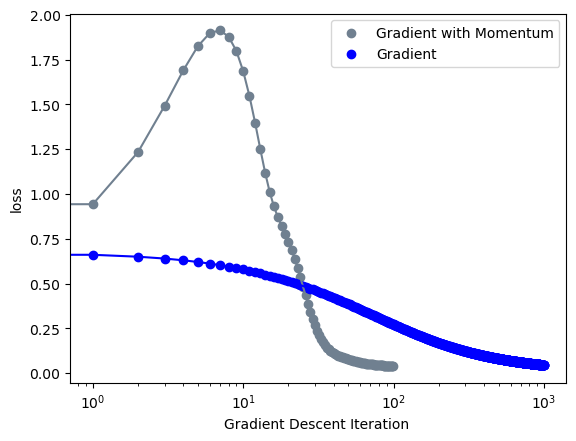

In [205]:
plt.scatter(torch.arange(len(mloss_vec)), mloss_vec, color = "slategrey", label ="Gradient Descent with Momentum")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "blue", label ="Vanilla Gradient Descent")
plt.plot(mloss_vec, color = "slategrey")
plt.plot(loss_vec, color = "blue")
plt.semilogx()
plt.legend()
labs = plt.gca().set(xlabel = "Gradient Descent Iteration ", ylabel = "loss")

Here we can see how our momentum gradient descent seperates the data

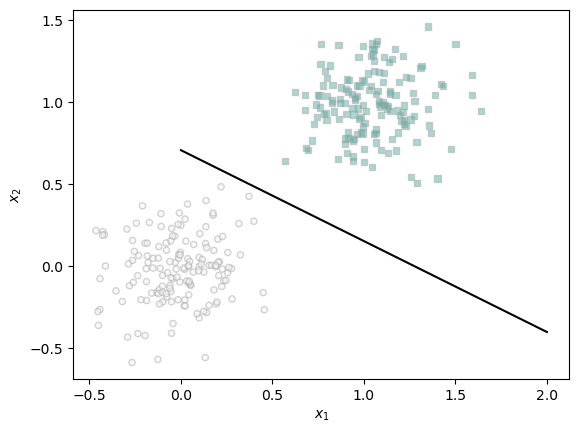

In [206]:
fig, ax = plt.subplots(1, 1)
plot_data(X, y, ax)

draw_line(mLRW, x_min = 0, x_max = 2, ax = ax, color = "black", linestyle = "solid")

## More features than data points

What if we had more features than data points? Here we try that out. In this example we have 50 points and 100 features. My hypothesis is that this might cause overfitting since our model will use these extra features to model the 50 training points perfectly.

In [217]:
X_train, y_train = classification_data(50, 0.4, p_dims = 100)
X_test, y_test = classification_data(50, 0.4, p_dims = 100)

LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss_vec = []

loss = 1.0
iter = 0
max_iter = 1000
while loss > 0.001:
    # add other stuff to e.g. keep track of the loss over time. 
    loss = LR.loss(X_train, y_train)
    loss_vec.append(loss)
    opt.step(X_train, y_train, alpha = 0.01, beta = 0.7)
    iter+=1

LRW = LR.w


## Loss

As we can see, the model still reaches a solution. I'm not exactly sure why the graph looks the way it does but I know it's cause from inf and NaN values in our loss function. Check out my implementation for more information.

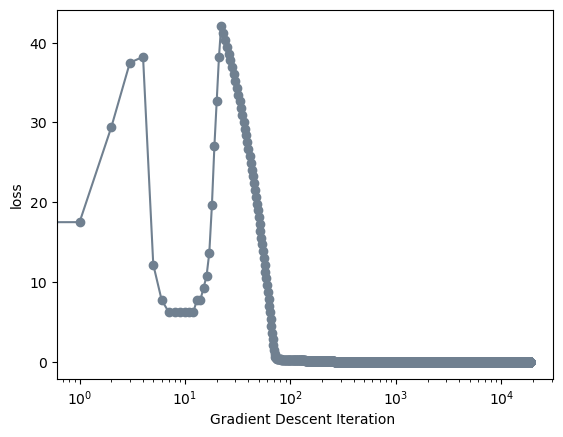

In [212]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
plt.semilogx()
labs = plt.gca().set(xlabel = "Gradient Descent Iteration ", ylabel = "loss")

## Accuracy

As we can see our model gets 100% accuracy on our training model but only 96% accuracy on our testing data. While this doesn't clearly indicate overfitting, it does somewhat support our hypothesis that our model would more accurately model our training data than our testing data.

In [219]:
(1.0*(LR.predict(X_train) == y_train)).mean()

tensor(1.)

In [218]:
(1.0*(LR.predict(X_test) == y_test)).mean()

tensor(0.9600)

# Discussion

Thank you for reading! In this blog post we examined Logistic Regression and using Gradient Descent to optimize our data. Our experimentation proved out hypothesis that this method would accurately find solutions to linearly seperable data. It also worked when we significantly increased the number of features. We did see however how one must be careful to not have the model overfit to training data because it can caused decreased accuracy in the testing data. This can be caused by having too many features as we saw in the final example